In [77]:
import shutil
import logging
import numpy as np
import matplotlib.pyplot as plt
from madminer.utils.interfaces.mg import (
    generate_mg_process,
    prepare_run_mg_pythia,
    run_mg_pythia,
)

In [2]:
mg_directory = '/Users/dpappadopulo/Projects/~Physics/MG5_2.6.4'
temp_directory = mg_directory + '/tmp'
cards_dir = '/Users/dpappadopulo/Projects/~Physics/madminer/examples/example1_wgamma/cards'
lhapdf_repo = "/Users/dpappadopulo/Projects/~Physics/MG5_2.6.4/HEPTools/lhapdf6/share/LHAPDF/PDF4LHC_repo"
lhapdf_dir = "/Users/dpappadopulo/Projects/~Physics/MG5_2.6.4/HEPTools/lhapdf6/share/LHAPDF/PDF4LHC15_nlo_30"


run_cards = ['run_card_{}.dat'.format(i) for i in range(18)]
dat_files = ['PDF4LHC15_nlo_30_'+'{:04d}'.format(i)+'.dat' for i in range(31)]

This set up the environment to generate the events

In [3]:
generate_mg_process(
            mg_directory,
            temp_directory, # ?
            cards_dir + '/proc_card_wgamma.dat', # where the process card is
            temp_directory , # events are gonna go in temp_directory/Events
            ufo_model_directory=None,
            log_file=temp_directory+ '/log.txt', # where to save the logs
            initial_command= None # forget about this
        )

Generate the events

In [ ]:
for bin_id in range(18):
    for pdf_id in range(31):
        print "Doing pT bin number: {}".format(bin_id) + " - PDF member number: {}".format(pdf_id)
        
        # This moves everythime the PDF card in the folder where it can be read by MG, 
        # and renames it as the central member of the PDF set.
        shutil.copy(lhapdf_repo + '/' + dat_files[pdf_id], lhapdf_dir + '/' + 'PDF4LHC15_nlo_30_0000.dat')
        
        run_mg_pythia(
                        mg_directory,
                        temp_directory,
                        proc_card_filename=None,
                        run_card_file=cards_dir + '/runcards_photon_pT_cut/' + run_cards[bin_id],
                        param_card_file=None,
                        reweight_card_file=None,
                        pythia8_card_file=None,
                        is_background=False,
                        initial_command=None,
                        log_file=temp_directory+ '/log.txt',
                        )

Read files and calculate stuff

In [22]:
events_directory = temp_directory + '/Events'  # contains run_ID folders

In [23]:
def get_file(bin_id, pdf_id):
    """
    bin_id from 0 to 17
    run_id from 1 to 30
    """
    label = bin_id*31+pdf_id+1
    return '/run_'+'{:02d}'.format(label)+'/run_{:02d}_tag_1_banner.txt'.format(label)

In [29]:
results = {}
for bin_id in range(18):
    for pdf_id in range(31):
        #print "Doing pT bin number: {}".format(bin_id) + " - PDF member number: {}".format(pdf_id)
        with open(events_directory +get_file(bin_id, pdf_id), 'r') as f:
            for line in f:
                if 'Integrated weight' in line:
                    results[(bin_id, pdf_id)] = float(line.split()[-1])

In [42]:
pt_values = {}
for bin_id in range(18):
    pt_bin = []
    with open(cards_dir + '/runcards_photon_pT_cut/' + run_cards[bin_id], 'r') as f:
        for line in f:
            if 'minimum pt for the photons' in line:
                pt_bin.append(float(line.split()[0]))
            if 'maximum pt for the photons' in line:
                pt_bin.append(float(line.split()[0]))
        pt_values[bin_id] = pt_bin

In [55]:
sigma_pt_values = {i: [] for i in range(18)}
for k, v in results.items():
    sigma_pt_values[k[0]].append((k[1], v))
for k, v in sigma_pt_values.items():
    sigma_pt_values[k] = sorted(v, key=lambda x: x[0])

In [62]:
delta_pt_bin = {}
for bin_id in range(18):
    delta = 0
    central = sigma_pt_values[bin_id][0][1]
    for member in sigma_pt_values[bin_id][1:]:
        delta += (member[1]-central) ** 2
    delta_pt_bin[bin_id] = np.sqrt(delta) / central

Plot

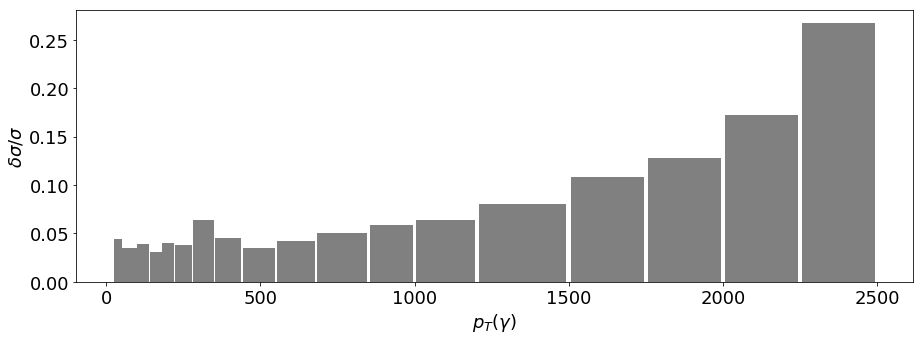

In [106]:
bins_lower = np.array([v[0] for v in pt_values.values()])
bins_higher =  np.array([v[1] for v in pt_values.values()])
bins = (bins_higher+bins_lower)/2

plt.rcParams.update({'font.size': 18})
f, ax = plt.subplots(figsize=(15,5))
plt.bar(bins, delta_pt_bin.values(), width =0.95* (bins_higher-bins_lower), color = 'gray')
plt.xlabel('$p_T(\gamma)$', fontsize=18)
plt.ylabel('$\delta \sigma / \sigma$', fontsize=18)
plt.show()

In [163]:
scrapers0 = [{'amt_issued': '1.25e+09', 'askprecision': '1', 'aysp': '78.5', 'bbid': 'AT519156', 'bidprecision': '1', 'bysp': '80.5', 'confidence': '0.900000', 'coup': '0.5', 'cpntype': 'coupon', 'cusip': '', 'figi': 'BBG00LDCJ378', 'imty': '20230717', 'maty': '07/17/2023 ', 'pat': 'BOND_OFFER', 'probable_coup': '0', 'probable_mat': '1/2', 'ptyp': 'frac', 'qf_aysp': '78.5', 'qf_bysp': '80.5', 'qtyp': 'SPREAD', 'quot': '80.5/78.5', 'row': '8', 'sec': 'ABNANV 0.5 07/17/2023 ', 'tick': 'ABNANV', 'ticker': 'ABNANV', 'type': 'B', 'valid_state': 'CORP', 'vlvl': 'S2P2', 'vpx': '100.7', 'vsrc': 'BVAL', 'ykey': 'corp'}, {'amt_issued': '1.5e+09', 'askprecision': '0', 'aysp': '79', 'bbid': 'AT518884', 'bidprecision': '0', 'bysp': '81', 'confidence': '0.900000', 'coup': '0.5', 'cpntype': 'coupon', 'cusip': '', 'figi': 'BBG00LDCH049', 'imty': '20221116', 'maty': '11/16/2022 ', 'pat': 'BOND_OFFER', 'probable_coup': '0', 'probable_mat': '1/2', 'ptyp': 'frac', 'qf_aysp': '79', 'qf_bysp': '81', 'qtyp': 'SPREAD', 'quot': '81/79', 'row': '9', 'sec': 'BFCM 0.5 11/16/2022 ', 'tick': 'BFCM', 'ticker': 'BFCM', 'type': 'B', 'valid_state': 'CORP', 'vlvl': 'S2P2', 'vpx': '99.8', 'vsrc': 'BVAL', 'ykey': 'corp'}, {'amt_issued': '1e+09', 'askprecision': '0', 'aysp': '65', 'bbid': 'AT537161', 'bidprecision': '0', 'bysp': '69', 'companyid': '108444', 'confidence': '0.900000', 'coup': '0.25', 'cpntype': 'coupon', 'cusip': '', 'figi': 'BBG00LDK2NF5', 'imty': '20211117', 'match_confidence': '1.000000', 'maty': '11/17/2021 ', 'pat': 'BOND_OFFER', 'probable_coup': '0', 'probable_mat': '1/4', 'ptyp': 'frac', 'qf_aysp': '65', 'qf_bysp': '69', 'qtyp': 'SPREAD', 'quot': '69/65', 'row': '11', 'sec': 'BMO 0.25 11/17/2021 ', 'tick': 'BMO', 'ticker': 'BMO', 'type': 'B', 'valid_state': 'CORP', 'vlvl': 'S2P2', 'vpx': '84.9', 'vsrc': 'BVAL', 'ykey': 'corp'}, {'amt_issued': '1.75e+09', 'askprecision': '0', 'aysp': '151', 'bbid': 'AT634853', 'bidprecision': '0', 'bysp': '153', 'companyid': '101214', 'confidence': '0.900000', 'coup': '1.5', 'cpntype': 'coupon', 'cusip': '', 'figi': 'BBG00LG5J3S7', 'imty': '20260724', 'maty': '07/24/2026 ', 'pat': 'BOND_OFFER', 'perpmaty': '2057', 'probable_coup': '1', 'probable_mat': '1/2', 'ptyp': 'frac', 'qf_aysp': '151', 'qf_bysp': '153', 'qtyp': 'SPREAD', 'quot': '153/151', 'row': '12', 'sec': 'C 1.5 07/24/2026 ', 'tick': 'C', 'ticker': 'C', 'type': 'B', 'valid_state': 'CORP', 'vlvl': 'S2P2', 'vpx': '180.5', 'vsrc': 'BVAL', 'ykey': 'corp'}, {'amt_issued': '1.5e+09', 'askprecision': '0', 'aysp': '166', 'bbid': 'AT743653', 'bidprecision': '0', 'bysp': '168', 'companyid': '348768', 'confidence': '0.900000', 'coup': '2', 'cpntype': 'coupon', 'cusip': '', 'default_currency': 'USD', 'default_debt': '', 'figi': 'BBG00LK624X0', 'imty': '20281101', 'maty': '11/01/2028 ', 'pat': 'BOND_OFFER', 'qf_aysp': '166', 'qf_bysp': '168', 'qtyp': 'SPREAD', 'quot': '168/166', 'row': '13', 'sec': 'GS 2 11/01/2028 ', 'tick': 'GS', 'ticker': 'GS', 'type': 'B', 'valid_state': 'CORP', 'vlvl': 'S2P2', 'vpx': '210.3', 'vsrc': 'BVAL', 'ykey': 'corp'}, {'amt_issued': '1.5e+09', 'askprecision': '0', 'aysp': '79', 'bbid': 'AT580277', 'bidprecision': '0', 'bysp': '81', 'companyid': '110755', 'confidence': '0.900000', 'coup': '0.625', 'cpntype': 'coupon', 'cusip': '', 'figi': 'BBG00LFJXV73', 'imty': '20230720', 'match_confidence': '1.000000', 'maty': '07/20/2023 ', 'pat': 'BOND_OFFER', 'probable_coup': '0', 'probable_mat': '5/8', 'ptyp': 'frac', 'qf_aysp': '79', 'qf_bysp': '81', 'qtyp': 'SPREAD', 'quot': '81/79', 'row': '16', 'sec': 'TD 0.625 07/20/2023 ', 'tick': 'TD', 'ticker': 'TD', 'type': 'B', 'valid_state': 'CORP', 'vlvl': 'S2P2', 'vpx': '99.5', 'vsrc': 'BVAL', 'ykey': 'corp'}, {'bbid': 'AM344158', 'bidprecision': '0', 'bsiz': '10000.0', 'bysp': '85', 'companyid': '101032', 'confidence': '0.980000', 'coup': '0.736', 'cpntype': 'coupon', 'cusip': '15608635', 'figi': 'BBG00FWX8GW9', 'match_confidence': '1.000000', 'maty': '02/07/2022 ', 'pat': 'BOND_OFFER', 'qf_bid': '85', 'qf_bysp': '85', 'qtyp': 'SPREAD', 'quot': '85/', 'rating_indicator': 'UK', 'row': '28', 'sec': 'AM344158 corp', 'sinkable': 'N', 'size': '10mx', 'szvl': 'Z2', 'tick': 'BAC', 'ticker': 'BAC', 'type': 'B', 'valid_state': 'CORP', 'vlvl': 'S2P2', 'vpx': '118.5', 'vsrc': 'BVAL', 'whole_callable': 'N', 'ykey': 'corp'}, {'bbid': 'UV800880', 'bidprecision': '0', 'bsiz': '10000.0', 'bysp': '88', 'companyid': '101032', 'confidence': '0.980000', 'coup': '1.625', 'cpntype': 'coupon', 'cusip': '12908507', 'figi': 'BBG009YWKCF7', 'match_confidence': '1.000000', 'maty': '09/14/2022 ', 'pat': 'BOND_OFFER', 'probable_coup': '1', 'probable_mat': '5/8', 'ptyp': 'frac', 'qf_bid': '88', 'qf_bysp': '88', 'qtyp': 'SPREAD', 'quot': '88/', 'rating_indicator': 'UK', 'row': '29', 'sec': 'UV800880 corp', 'sinkable': 'N', 'size': '10mx', 'szvl': 'Z2', 'tick': 'BAC', 'ticker': 'BAC', 'type': 'B', 'valid_state': 'CORP', 'vlvl': 'S2P2', 'vpx': '115.8', 'vsrc': 'BVAL', 'whole_callable': 'N', 'ykey': 'corp'}, {'bbid': 'JK483390', 'bidprecision': '0', 'bsiz': '10000.0', 'bysp': '92', 'companyid': '179685', 'confidence': '0.980000', 'coup': '1.875', 'cpntype': 'coupon', 'cusip': '13850511', 'default_currency': 'EUR', 'default_debt': '', 'figi': 'BBG00CGKCF31', 'match_confidence': '1.000000', 'maty': '03/23/2021 ', 'pat': 'BOND_OFFER', 'probable_coup': '1', 'probable_mat': '7/8', 'ptyp': 'frac', 'qf_bid': '92', 'qf_bysp': '92', 'qtyp': 'SPREAD', 'quot': '92/', 'rating_indicator': 'UK', 'row': '38', 'sec': 'JK483390 corp', 'sinkable': 'N', 'size': '10mx', 'szvl': 'Z2', 'tick': 'BACR', 'ticker': 'BACR', 'type': 'B', 'valid_state': 'CORP', 'vlvl': 'S2P1', 'vpx': '172.9', 'vsrc': 'BVAL', 'whole_callable': 'N', 'ykey': 'corp'}, {'bbid': 'EK848534', 'bidprecision': '0', 'bsiz': '5000000.0', 'bysp': '114', 'companyid': '115662', 'confidence': '0.980000', 'coup': '1.25', 'cpntype': 'coupon', 'cusip': '12182872', 'figi': 'BBG008G8Z8Z3', 'match_confidence': '1.000000', 'maty': '04/14/2022 ', 'pat': 'BOND_OFFER', 'probable_coup': '1', 'probable_mat': '1/4', 'ptyp': 'frac', 'qf_bid': '114', 'qf_bysp': '114', 'qtyp': 'SPREAD', 'quot': '114/', 'rating_indicator': 'UK', 'row': '39', 'sec': 'EK848534 corp', 'sinkable': 'N', 'size': '5mx', 'szvl': 'Z2', 'tick': 'CS', 'ticker': 'CS', 'type': 'B', 'valid_state': 'CORP', 'vlvl': 'S2P2', 'vpx': '153', 'vsrc': 'BVAL', 'whole_callable': 'N', 'ykey': 'corp'}, {'bbid': 'AL727457', 'bidprecision': '0', 'bsiz': '5000000.0', 'bysp': '125', 'companyid': '115510', 'confidence': '0.980000', 'coup': '1', 'cpntype': 'coupon', 'cusip': '15388677', 'default_currency': 'EUR', 'default_debt': '', 'figi': 'BBG00FJ8N878', 'match_confidence': '1.000000', 'maty': '04/01/2022 ', 'pat': 'BOND_OFFER', 'qf_bid': '125', 'qf_bysp': '125', 'qtyp': 'SPREAD', 'quot': '125/', 'rating_indicator': 'UK', 'row': '40', 'sec': 'AL727457 corp', 'sinkable': 'N', 'size': '5mx', 'szvl': 'Z2', 'tick': 'SOCGEN', 'ticker': 'SOCGEN', 'type': 'B', 'valid_state': 'CORP', 'vlvl': 'S2P2', 'vpx': '140.8', 'vsrc': 'BVAL', 'whole_callable': 'N', 'ykey': 'corp'}, {'bbid': 'AP306654', 'bidprecision': '0', 'bsiz': '5000000.0', 'bysp': '140', 'companyid': '819844', 'confidence': '0.980000', 'coup': '0.75', 'cpntype': 'coupon', 'cusip': '16932815', 'figi': 'BBG00HTKNLR5', 'match_confidence': '1.000000', 'maty': '10/03/2023 ', 'pat': 'BOND_OFFER', 'probable_coup': '0', 'probable_mat': '3/4', 'ptyp': 'frac', 'qf_bid': '140', 'qf_bysp': '140', 'qtyp': 'SPREAD', 'quot': '140/', 'rating_indicator': 'UK', 'row': '41', 'sec': 'AP306654 corp', 'sinkable': 'N', 'size': '5mx', 'szvl': 'Z2', 'tick': 'STANLN', 'ticker': 'STANLN', 'type': 'B', 'valid_state': 'CORP', 'vlvl': 'S2P1', 'vpx': '220', 'vsrc': 'BVAL', 'whole_callable': 'N', 'ykey': 'corp'}, {'asiz': '5000000.0', 'askprecision': '0', 'aysp': '145', 'bbid': 'AT001035', 'companyid': '894524', 'confidence': '0.980000', 'coup': '1.125', 'cpntype': 'coupon', 'cusip': '18379979', 'figi': 'BBG00L4247Q6', 'match_confidence': '1.000000', 'maty': '06/14/2023 ', 'pat': 'BOND_OFFER', 'probable_coup': '1', 'probable_mat': '1/8', 'ptyp': 'frac', 'qf_ask': '145', 'qf_aysp': '145', 'qtyp': 'SPREAD', 'quot': '/145', 'rating_indicator': 'UK', 'row': '46', 'sec': 'AT001035 corp', 'sinkable': 'N', 'size': 'x5m', 'szvl': 'Z2', 'tick': 'RBS', 'ticker': 'RBS', 'type': 'B', 'valid_state': 'CORP', 'vlvl': 'S2P1', 'vpx': '223.9', 'vsrc': 'BVAL', 'whole_callable': 'N', 'ykey': 'corp'}, {'bbid': 'EK110960', 'bidprecision': '0', 'bsiz': '5000000.0', 'bysp': '59', 'confidence': '0.980000', 'coup': '2.125', 'cpntype': 'coupon', 'cusip': '00117817', 'figi': 'BBG0063LNS81', 'maty': '03/17/2021 ', 'pat': 'BOND_OFFER', 'probable_coup': '2', 'probable_mat': '1/8', 'ptyp': 'frac', 'qf_bid': '59', 'qf_bysp': '59', 'qtyp': 'SPREAD', 'quot': '59/', 'rating_indicator': 'UK', 'row': '49', 'sec': 'EK110960 corp', 'sinkable': 'N', 'size': '5mx', 'szvl': 'Z2', 'tick': 'BPCEGP', 'ticker': 'BPCEGP', 'type': 'B', 'valid_state': 'CORP', 'vlvl': 'S2P2', 'vpx': '69.9', 'vsrc': 'BVAL', 'whole_callable': 'N', 'ykey': 'corp'}, {'bbid': 'QJ646313', 'bidprecision': '0', 'bsiz': '5000000.0', 'bysp': '55', 'companyid': '216301', 'confidence': '0.980000', 'coup': '0.75', 'cpntype': 'coupon', 'cusip': '13242177', 'figi': 'BBG00BCQ08Q8', 'match_confidence': '1.000000', 'maty': '11/24/2020 ', 'pat': 'BOND_OFFER', 'probable_coup': '0', 'probable_mat': '3/4', 'ptyp': 'frac', 'qf_bid': '55', 'qf_bysp': '55', 'qtyp': 'SPREAD', 'quot': '55/', 'rating_indicator': 'UK', 'row': '50', 'sec': 'QJ646313 corp', 'sinkable': 'N', 'size': '5mx', 'szvl': 'Z2', 'tick': 'INTNED', 'ticker': 'INTNED', 'type': 'B', 'valid_state': 'CORP', 'vlvl': 'S2P2', 'vpx': '70', 'vsrc': 'BVAL', 'whole_callable': 'N', 'ykey': 'corp'}, {'bbid': 'JK108167', 'bidprecision': '0', 'bsiz': '5000000.0', 'bysp': '59', 'companyid': '216301', 'confidence': '0.980000', 'coup': '0.75', 'cpntype': 'coupon', 'cusip': '13685765', 'figi': 'BBG00C7M1SS4', 'match_confidence': '1.000000', 'maty': '02/22/2021 ', 'pat': 'BOND_OFFER', 'probable_coup': '0', 'probable_mat': '3/4', 'ptyp': 'frac', 'qf_bid': '59', 'qf_bysp': '59', 'qtyp': 'SPREAD', 'quot': '59/', 'rating_indicator': 'UK', 'row': '51', 'sec': 'JK108167 corp', 'sinkable': 'N', 'size': '5mx', 'szvl': 'Z2', 'tick': 'INTNED', 'ticker': 'INTNED', 'type': 'B', 'valid_state': 'CORP', 'vlvl': 'S2P2', 'vpx': '82.7', 'vsrc': 'BVAL', 'whole_callable': 'N', 'ykey': 'corp'}, {'bbid': 'AO167384', 'bidprecision': '0', 'bsiz': '5000000.0', 'bysp': '65', 'companyid': '156262', 'confidence': '0.980000', 'coup': '0.5', 'cpntype': 'coupon', 'cusip': '16427388', 'figi': 'BBG00H2CQQV3', 'match_confidence': '1.000000', 'maty': '12/06/2022 ', 'pat': 'BOND_OFFER', 'probable_coup': '0', 'probable_mat': '1/2', 'ptyp': 'frac', 'qf_bid': '65', 'qf_bysp': '65', 'qtyp': 'SPREAD', 'quot': '65/', 'rating_indicator': 'UK', 'row': '52', 'sec': 'AO167384 corp', 'sinkable': 'N', 'size': '5mx', 'szvl': 'Z2', 'tick': 'RABOBK', 'ticker': 'RABOBK', 'type': 'B', 'valid_state': 'CORP', 'vlvl': 'S2P2', 'vpx': '71.9', 'vsrc': 'BVAL', 'whole_callable': 'N', 'ykey': 'corp'}, {'amt_issued': '7.5e+08', 'asiz': '750000.0', 'askprecision': '0', 'aysp': '98', 'bbid': 'AT518890', 'bidprecision': '0', 'bsiz': '750000.0', 'bysp': '100', 'confidence': '0.900000', 'coup': '1.375', 'cpntype': 'coupon', 'cusip': '', 'figi': 'BBG00LDCH0Z5', 'filter': ',CONTRIBUTE_DATA_INDICATOR,STRUCTURED_NOTE_INDICATOR,AMTISSD,CURRENCYCONTEXT,FILTERHITS', 'imty': '20280716', 'maty': '07/16/2028 ', 'pat': 'BOND_OFFER', 'price_adjust': 'yes', 'probable_coup': '1', 'probable_mat': '3/8', 'ptyp': 'frac', 'qf_ask': '198', 'qf_aysp': '98', 'qf_bid': '100', 'qf_bysp': '100', 'qtyp': 'SPREAD', 'quot': '100/98', 'row': '10', 'sec': 'BFCM 1.375 07/16/2028 ', 'size': '750mx750m', 'spread_adjust': 'yes', 'szvl': 'Z2', 'tick': 'BFCM', 'ticker': 'BFCM', 'type': 'B', 'valid_state': 'CORP', 'vlvl': 'S2P2', 'vpx': '112.3', 'vsrc': 'BVAL', 'ykey': 'corp'}, {'amt_issued': '5e+08', 'asiz': '500000.0', 'askprecision': '0', 'aysp': '97', 'bbid': 'AT537624', 'bidprecision': '0', 'bsiz': '500000.0', 'bysp': '100', 'confidence': '0.900000', 'coup': '0.5', 'cpntype': 'coupon', 'cusip': '', 'figi': 'BBG00LDK4ZD8', 'imty': '20220119', 'maty': '01/19/2022 ', 'pat': 'BOND_OFFER', 'price_adjust': 'yes', 'probable_coup': '0', 'probable_mat': '1/2', 'ptyp': 'frac', 'qf_ask': '197', 'qf_aysp': '97', 'qf_bid': '100', 'qf_bysp': '100', 'qtyp': 'SPREAD', 'quot': '100/97', 'row': '14', 'sec': 'NYKRE 0.5 01/19/2022 ', 'size': '500mx500m', 'spread_adjust': 'yes', 'szvl': 'Z2', 'tick': 'NYKRE', 'ticker': 'NYKRE', 'type': 'B', 'valid_state': 'CORP', 'vlvl': 'S2P2', 'vpx': '127.9', 'vsrc': 'BVAL', 'ykey': 'corp'}, {'amt_issued': '5e+08', 'asiz': '500000.0', 'askprecision': '0', 'aysp': '94', 'bbid': 'AT634324', 'bidprecision': '0', 'bsiz': '500000.0', 'bysp': '96', 'companyid': '114800', 'confidence': '0.900000', 'coup': '0.819', 'cpntype': 'coupon', 'cusip': '', 'figi': 'BBG00LG5GMW3', 'imty': '20230723', 'match_confidence': '1.000000', 'maty': '07/23/2023 ', 'pat': 'BOND_OFFER', 'qf_aysp': '94', 'qf_bysp': '96', 'qtyp': 'SPREAD', 'quot': '96/94', 'row': '15', 'sec': 'SUMIBK 0.819 07/23/2023 ', 'size': '500mx500m', 'szvl': 'Z2', 'tick': 'SUMIBK', 'ticker': 'SUMIBK', 'type': 'B', 'valid_state': 'CORP', 'vlvl': 'S2P2', 'vpx': '115.8', 'vsrc': 'BVAL', 'ykey': 'corp'}, {'amt_issued': '6.5e+08', 'asiz': '650000.0', 'askprecision': '0', 'aysp': '87', 'bbid': 'AT519140', 'bidprecision': '0', 'bsiz': '650000.0', 'bysp': '89', 'companyid': '101650', 'confidence': '0.900000', 'coup': '0.75', 'cpntype': 'coupon', 'cusip': '', 'figi': 'BBG00LDCHYD5', 'imty': '20231017', 'match_confidence': '1.000000', 'maty': '10/17/2023 ', 'pat': 'BOND_OFFER', 'probable_coup': '0', 'probable_mat': '3/4', 'ptyp': 'frac', 'qf_aysp': '87', 'qf_bysp': '89', 'qtyp': 'SPREAD', 'quot': '89/87', 'row': '17', 'sec': 'WSTP 0.75 10/17/2023 ', 'size': '650mx650m', 'szvl': 'Z2', 'tick': 'WSTP', 'ticker': 'WSTP', 'type': 'B', 'valid_state': 'CORP', 'vlvl': 'S2P2', 'vpx': '106.4', 'vsrc': 'BVAL', 'ykey': 'corp'}, {'amt_issued': '8.5e+08', 'asiz': '850000.0', 'askprecision': '0', 'aysp': '86', 'bbid': 'AT519144', 'bidprecision': '0', 'bsiz': '850000.0', 'bysp': '89', 'companyid': '101650', 'confidence': '0.900000', 'coup': '1.45', 'cpntype': 'coupon', 'cusip': '', 'figi': 'BBG00LDCJ001', 'imty': '20280717', 'match_confidence': '1.000000', 'maty': '07/17/2028 ', 'pat': 'BOND_OFFER', 'qf_aysp': '86', 'qf_bysp': '89', 'qtyp': 'SPREAD', 'quot': '89/86', 'row': '18', 'sec': 'WSTP 1.45 07/17/2028 ', 'size': '850mx850m', 'szvl': 'Z2', 'tick': 'WSTP', 'ticker': 'WSTP', 'type': 'B', 'valid_state': 'CORP', 'vlvl': 'S2P2', 'vpx': '116', 'vsrc': 'BVAL', 'ykey': 'corp'}, {'asiz': '5000000.0', 'askprecision': '0', 'aysp': '138', 'bbid': 'AR757787', 'companyid': '101214', 'confidence': '0.980000', 'coup': '1.625', 'cpntype': 'coupon', 'cusip': '17952526', 'figi': 'BBG00K9ZX895', 'maty': '03/21/2028 ', 'pat': 'BOND_OFFER', 'perpmaty': '2057', 'probable_coup': '1', 'probable_mat': '5/8', 'ptyp': 'frac', 'qf_ask': '138', 'qf_aysp': '138', 'qtyp': 'SPREAD', 'quot': '/138', 'rating_indicator': 'UK', 'row': '24', 'sec': 'AR757787 corp', 'sinkable': 'N', 'size': 'x5m', 'szvl': 'Z2', 'tick': 'C', 'ticker': 'C', 'type': 'B', 'valid_state': 'CORP', 'vlvl': 'S2P2', 'vpx': '169.3', 'vsrc': 'BVAL', 'whole_callable': 'N', 'ykey': 'corp'}, {'asiz': '5000000.0', 'askprecision': '0', 'aysp': '133', 'bbid': 'AS149389', 'confidence': '0.980000', 'coup': '1', 'cpntype': 'coupon', 'cusip': '18083385', 'figi': 'BBG00KK2XY16', 'maty': '04/17/2024 ', 'pat': 'BOND_OFFER', 'qf_ask': '133', 'qf_aysp': '133', 'qtyp': 'SPREAD', 'quot': '/133', 'rating_indicator': 'UK', 'row': '35', 'sec': 'AS149389 corp', 'sinkable': 'N', 'size': 'x5m', 'szvl': 'Z2', 'tick': 'BNP', 'ticker': 'BNP', 'type': 'B', 'valid_state': 'CORP', 'vlvl': 'S2P2', 'vpx': '165.4', 'vsrc': 'BVAL', 'whole_callable': 'N', 'ykey': 'corp'}, {'asiz': '3000000.0', 'askprecision': '0', 'aysp': '144', 'bbid': 'AN318761', 'companyid': '116646', 'confidence': '0.980000', 'coup': '1.875', 'cpntype': 'coupon', 'cusip': '16038921', 'default_currency': 'USD', 'default_debt': '', 'figi': 'BBG00GK2VGF1', 'match_confidence': '1.000000', 'maty': '04/27/2027 ', 'pat': 'BOND_OFFER', 'probable_coup': '1', 'probable_mat': '7/8', 'ptyp': 'frac', 'qf_ask': '144', 'qf_aysp': '144', 'qtyp': 'SPREAD', 'quot': '/144', 'rating_indicator': 'UK', 'row': '25', 'sec': 'AN318761 corp', 'sinkable': 'N', 'size': 'x3m', 'szvl': 'Z2', 'tick': 'MS', 'ticker': 'MS', 'type': 'B', 'valid_state': 'CORP', 'vlvl': 'S2P2', 'vpx': '181.4', 'vsrc': 'BVAL', 'whole_callable': 'N', 'ykey': 'corp'}, {'asiz': '3000000.0', 'askprecision': '0', 'aysp': '208', 'bbid': 'AQ825885', 'companyid': '179685', 'confidence': '0.980000', 'coup': '1.375', 'cpntype': 'coupon', 'cusip': '17573943', 'default_currency': 'EUR', 'default_debt': '', 'figi': 'BBG00JRTSSC0', 'match_confidence': '1.000000', 'maty': '01/24/2026 ', 'pat': 'BOND_OFFER', 'probable_coup': '1', 'probable_mat': '3/8', 'ptyp': 'frac', 'qf_ask': '208', 'qf_aysp': '208', 'qtyp': 'SPREAD', 'quot': '/208', 'rating_indicator': 'UK', 'row': '34', 'sec': 'AQ825885 corp', 'sinkable': 'N', 'size': 'x3m', 'szvl': 'Z2', 'tick': 'BACR', 'ticker': 'BACR', 'type': 'B', 'valid_state': 'CORP', 'vlvl': 'S2P1', 'vpx': '310.5', 'vsrc': 'BVAL', 'whole_callable': 'N', 'ykey': 'corp'}, {'asiz': '850000.0', 'askprecision': '1', 'aysp': '86', 'bbid': 'EK472649', 'bidprecision': '0', 'bsiz': '850000.0', 'bysp': '89', 'confidence': '0.980000', 'coup': '1.375', 'cpntype': 'coupon', 'figi': 'BBG0072HM152', 'maty': '09/10/2021 ', 'pat': 'BOND_OFFER', 'qf_ask': '167.2', 'qf_aysp': '167.2', 'qf_bysp': '89', 'qtyp': 'PRICE', 'quot': '-167.2', 'rating_indicator': 'UK', 'row': '18', 'sec': 'EK472649 corp', 'sinkable': 'N', 'size': '850mx850m', 'szvl': 'Z2', 'tick': 'BAC', 'ticker': 'BAC', 'type': 'B', 'vlvl': 'S2P2', 'vpx': '91.8', 'vsrc': 'BVAL', 'whole_callable': 'N', 'ykey': 'corp'}]

scrapers1 = [{'amt_issued': '9e+08', 'bbid': 'AM280873', 'bidprecision': '0', 'confidence': '0.900000', 'coup': '1.5', 'cpntype': 'coupon', 'cusip': '', 'figi': 'BBG00FVSYDF8', 'imty': '20370203', 'maty': '02/03/2037 ', 'pat': 'BOND_OFFER', 'probable_coup': '1', 'probable_mat': '1/2', 'ptyp': 'frac', 'row': '6', 'sec': 'ACACB 1.5 02/03/2037 ', 'side': 'BUY', 'tick': 'ACACB', 'ticker': 'ACACB', 'type': 'B', 'valid_state': 'CORP', 'vlvl': 'S2', 'vpx': '79', 'vsrc': 'CBBT', 'ykey': 'corp'}, {'amt_issued': '5e+08', 'bbid': 'AS151203', 'bidprecision': '0', 'companyid': '115239', 'confidence': '0.900000', 'coup': '1.375', 'cpntype': 'coupon', 'cusip': '', 'default_currency': 'EUR', 'default_debt': '', 'figi': 'BBG00KK34323', 'imty': '20330418', 'match_confidence': '1.000000', 'maty': '04/18/2033 ', 'pat': 'BOND_OFFER', 'probable_coup': '1', 'probable_mat': '3/8', 'ptyp': 'frac', 'row': '7', 'sec': 'AXASA 1.375 04/18/2033 ', 'side': 'BUY', 'tick': 'AXASA', 'ticker': 'AXASA', 'type': 'B', 'valid_state': 'CORP', 'vlvl': 'S2', 'vpx': '96.3', 'vsrc': 'CBBT', 'ykey': 'corp'}, {'amt_issued': '1e+09', 'bbid': 'AQ762538', 'bidprecision': '0', 'companyid': '108445', 'confidence': '0.900000', 'coup': '0.5', 'cpntype': 'coupon', 'cusip': '', 'figi': 'BBG00JR5JWF0', 'imty': '20250122', 'match_confidence': '1.000000', 'maty': '01/22/2025 ', 'pat': 'BOND_OFFER', 'probable_coup': '0', 'probable_mat': '1/2', 'ptyp': 'frac', 'row': '8', 'sec': 'BNS 0.5 01/22/2025 ', 'side': 'BUY', 'tick': 'BNS', 'ticker': 'BNS', 'type': 'B', 'valid_state': 'CORP', 'vlvl': 'S2', 'vpx': '70.9', 'vsrc': 'CBBT', 'ykey': 'corp'}, {'amt_issued': '5e+08', 'bbid': 'AT156594', 'bidprecision': '0', 'confidence': '0.900000', 'coup': '1.5', 'cpntype': 'coupon', 'cusip': '', 'figi': 'BBG00L765Z54', 'imty': '20380628', 'maty': '06/28/2038 ', 'pat': 'BOND_OFFER', 'probable_coup': '1', 'probable_mat': '1/2', 'ptyp': 'frac', 'row': '10', 'sec': 'CAFFIL 1.5 06/28/2038 ', 'side': 'BUY', 'tick': 'CAFFIL', 'ticker': 'CAFFIL', 'type': 'B', 'valid_state': 'CORP', 'vlvl': 'S2', 'vpx': '86', 'vsrc': 'CBBT', 'ykey': 'corp'}, {'amt_issued': '5e+08', 'bbid': 'AS362661', 'bidprecision': '0', 'confidence': '0.900000', 'coup': '0.875', 'cpntype': 'coupon', 'cusip': '', 'figi': 'BBG00KRL7LL2', 'imty': '20250508', 'maty': '05/08/2025 ', 'pat': 'BOND_OFFER', 'probable_coup': '0', 'probable_mat': '7/8', 'ptyp': 'frac', 'row': '11', 'sec': 'CRUNAV 0.875 05/08/2025 ', 'side': 'BUY', 'tick': 'CRUNAV', 'ticker': 'CRUNAV', 'type': 'B', 'valid_state': 'CORP', 'vlvl': 'S2', 'vpx': '100', 'vsrc': 'CBBT', 'ykey': 'corp'}, {'amt_issued': '1.25e+09', 'bbid': 'AS750177', 'bidprecision': '1', 'confidence': '0.900000', 'coup': '0.625', 'cpntype': 'coupon', 'cusip': '', 'figi': 'BBG00L00N6K1', 'imty': '20250530', 'maty': '05/30/2025 ', 'pat': 'BOND_OFFER', 'probable_coup': '0', 'probable_mat': '5/8', 'ptyp': 'frac', 'row': '13', 'sec': 'INGB 0.625 05/30/2025 ', 'side': 'BUY', 'tick': 'INGB', 'ticker': 'INGB', 'type': 'B', 'valid_state': 'CORP', 'vlvl': 'S2', 'vpx': '69.4', 'vsrc': 'CBBT', 'ykey': 'corp'}, {'amt_issued': '7.5e+08', 'bbid': 'AR621539', 'bidprecision': '1', 'confidence': '0.900000', 'coup': '0.75', 'cpntype': 'coupon', 'cusip': '', 'figi': 'BBG00K84J374', 'imty': '20250313', 'maty': '03/13/2025 ', 'pat': 'BOND_OFFER', 'probable_coup': '0', 'probable_mat': '3/4', 'ptyp': 'frac', 'row': '14', 'sec': 'NACN 0.75 03/13/2025 ', 'side': 'BUY', 'tick': 'NACN', 'ticker': 'NACN', 'type': 'B', 'valid_state': 'CORP', 'vlvl': 'S2', 'vpx': '72.4', 'vsrc': 'CBBT', 'ykey': 'corp'}, {'amt_issued': '1.15e+09', 'bbid': 'AN708306', 'bidprecision': '1', 'companyid': '156262', 'confidence': '0.900000', 'coup': '1.25', 'cpntype': 'coupon', 'cusip': '', 'figi': 'BBG00GSFG529', 'filter': ',CONTRIBUTE_DATA_INDICATOR,STRUCTURED_NOTE_INDICATOR,AMTISSD,CURRENCYCONTEXT,FILTERHITS', 'imty': '20320531', 'match_confidence': '1.000000', 'maty': '05/31/2032 ', 'pat': 'BOND_OFFER', 'probable_coup': '1', 'probable_mat': '1/4', 'ptyp': 'frac', 'row': '15', 'sec': 'RABOBK 1.25 05/31/2032 ', 'side': 'BUY', 'tick': 'RABOBK', 'ticker': 'RABOBK', 'type': 'B', 'valid_state': 'CORP', 'vlvl': 'S2', 'vpx': '89', 'vsrc': 'CBBT', 'ykey': 'corp'}, {'amt_issued': '1.25e+09', 'bbid': 'AS274272', 'bidprecision': '0', 'companyid': '156262', 'confidence': '0.900000', 'coup': '1.5', 'cpntype': 'coupon', 'cusip': '', 'figi': 'BBG00KN6ZH55', 'imty': '20380426', 'match_confidence': '1.000000', 'maty': '04/26/2038 ', 'pat': 'BOND_OFFER', 'probable_coup': '1', 'probable_mat': '1/2', 'ptyp': 'frac', 'row': '16', 'sec': 'RABOBK 1.5 04/26/2038 ', 'side': 'BUY', 'tick': 'RABOBK', 'ticker': 'RABOBK', 'type': 'B', 'valid_state': 'CORP', 'vlvl': 'S2', 'vpx': '83.7', 'vsrc': 'CBBT', 'ykey': 'corp'}, {'amt_issued': '5e+08', 'bbid': 'AS180118', 'bidprecision': '1', 'confidence': '0.900000', 'coup': '1.25', 'cpntype': 'coupon', 'cusip': '', 'figi': 'BBG00KK9DHK9', 'filter': ',CONTRIBUTE_DATA_INDICATOR,STRUCTURED_NOTE_INDICATOR,AMTISSD,CURRENCYCONTEXT,FILTERHITS', 'imty': '20330419', 'maty': '04/19/2033 ', 'pat': 'BOND_OFFER', 'probable_coup': '1', 'probable_mat': '1/4', 'ptyp': 'frac', 'row': '17', 'sec': 'SBAB 1.25 04/19/2033 ', 'side': 'BUY', 'tick': 'SBAB', 'ticker': 'SBAB', 'type': 'B', 'valid_state': 'CORP', 'vlvl': 'S2', 'vpx': '94.6', 'vsrc': 'CBBT', 'ykey': 'corp'}, {'amt_issued': '1e+09', 'bbid': 'QZ308448', 'bidprecision': '1', 'bysp': '0.5', 'confidence': '0.900000', 'coup': '0.25', 'cpntype': 'coupon', 'cusip': '', 'figi': 'BBG00DP0FZW4', 'imty': '20260830', 'maty': '08/30/2026 ', 'pat': 'BOND_OFFER', 'probable_coup': '0', 'probable_mat': '1/4', 'ptyp': 'frac', 'qf_bid': '0.5', 'qf_bysp': '0.5', 'qtyp': 'SPREAD', 'quot': '0.5/', 'row': '18', 'sec': 'SPABOL 0.25 08/30/2026 ', 'tick': 'SPABOL', 'ticker': 'SPABOL', 'type': 'B', 'valid_state': 'CORP', 'vlvl': 'S2P1', 'vsrc': 'N.A.', 'ykey': 'corp'}, {'amt_issued': '1e+09', 'bbid': 'AS828165', 'bidprecision': '0', 'companyid': '110755', 'confidence': '0.900000', 'coup': '0.625', 'cpntype': 'coupon', 'cusip': '', 'figi': 'BBG00L1BBXT1', 'imty': '20250606', 'match_confidence': '1.000000', 'maty': '06/06/2025 ', 'pat': 'BOND_OFFER', 'probable_coup': '0', 'probable_mat': '5/8', 'ptyp': 'frac', 'row': '19', 'sec': 'TD 0.625 06/06/2025 ', 'side': 'BUY', 'tick': 'TD', 'ticker': 'TD', 'type': 'B', 'valid_state': 'CORP', 'vlvl': 'S2', 'vpx': '76.6', 'vsrc': 'CBBT', 'ykey': 'corp'}, {'amt_issued': '5e+08', 'bbid': 'AN575636', 'bidprecision': '0', 'companyid': '101650', 'confidence': '0.900000', 'coup': '1.375', 'cpntype': 'coupon', 'cusip': '', 'figi': 'BBG00GPVZ2T4', 'imty': '20320517', 'match_confidence': '1.000000', 'maty': '05/17/2032 ', 'pat': 'BOND_OFFER', 'probable_coup': '1', 'probable_mat': '3/8', 'ptyp': 'frac', 'row': '20', 'sec': 'WSTP 1.375 05/17/2032 ', 'side': 'BUY', 'tick': 'WSTP', 'ticker': 'WSTP', 'type': 'B', 'valid_state': 'CORP', 'vlvl': 'S2', 'vpx': '98.5', 'vsrc': 'CBBT', 'ykey': 'corp'}, {'amt_issued': '5e+08', 'bbid': 'AQ598177', 'bidprecision': '0', 'companyid': '101650', 'confidence': '0.900000', 'coup': '1.25', 'cpntype': 'coupon', 'cusip': '', 'figi': 'BBG00JNJPL43', 'imty': '20330114', 'match_confidence': '1.000000', 'maty': '01/14/2033 ', 'pat': 'BOND_OFFER', 'probable_coup': '1', 'probable_mat': '1/4', 'ptyp': 'frac', 'row': '21', 'sec': 'WSTP 1.25 01/14/2033 ', 'side': 'BUY', 'tick': 'WSTP', 'ticker': 'WSTP', 'type': 'B', 'valid_state': 'CORP', 'vlvl': 'S2', 'vpx': '105.1', 'vsrc': 'CBBT', 'ykey': 'corp'}, {'amt_issued': '5e+08', 'asiz': '3000000.0', 'askprecision': '0', 'bbid': 'AS962550', 'confidence': '0.900000', 'coup': '0.875', 'cpntype': 'coupon', 'cusip': '', 'figi': 'BBG00L31KTR2', 'imty': '20230618', 'maty': '06/18/2023 ', 'pat': 'BOND_OFFER', 'probable_coup': '0', 'probable_mat': '7/8', 'ptyp': 'frac', 'row': '24', 'sec': 'CAJAMA 0.875 06/18/2023 ', 'side': 'SELL', 'size': 'x3', 'szvl': 'Z2', 'tick': 'CAJAMA', 'ticker': 'CAJAMA', 'type': 'B', 'valid_state': 'CORP', 'vlvl': 'S2', 'vpx': '103.9', 'vsrc': 'BGN', 'ykey': 'corp'}, {'amt_issued': '5e+08', 'bbid': 'AT537433', 'bsiz': '100000000.0', 'companyid': '197708', 'confidence': '0.900000', 'coup': '0.625', 'cpntype': 'coupon', 'cusip': '', 'figi': 'BBG00LDK3XZ0', 'imty': '20270719', 'match_confidence': '1.000000', 'maty': '07/19/2027 ', 'pat': 'BOND_OFFER', 'probable_coup': '0', 'probable_mat': '5/8', 'ptyp': 'frac', 'row': '9', 'sec': 'BYLAN 0.625 07/19/2027 ', 'side': 'BUY', 'size': '100mmx', 'szvl': 'Z2', 'tick': 'BYLAN', 'ticker': 'BYLAN', 'type': 'B', 'valid_state': 'CORP', 'vlvl': 'S2', 'ykey': 'corp'}, {'amt_issued': '1e+09', 'bbid': 'AS719531', 'bsiz': '100000000.0', 'companyid': '115684', 'confidence': '0.900000', 'coup': '0.625', 'cpntype': 'coupon', 'cusip': '', 'figi': 'BBG00KXZDZQ1', 'imty': '20250528', 'match_confidence': '1.000000', 'maty': '05/28/2025 ', 'pat': 'BOND_OFFER', 'probable_coup': '0', 'probable_mat': '5/8', 'ptyp': 'frac', 'row': '12', 'sec': 'CMZB 0.625 05/28/2025 ', 'side': 'BUY', 'size': '100mmx', 'szvl': 'Z2', 'tick': 'CMZB', 'ticker': 'CMZB', 'type': 'B', 'valid_state': 'CORP', 'vlvl': 'S2', 'ykey': 'corp'}, {'amt_issued': '1e+09', 'asiz': '6000000.0', 'bbid': 'UV343870', 'confidence': '0.900000', 'coup': '0.375', 'cpntype': 'coupon', 'cusip': '', 'figi': 'BBG009PGZ9R0', 'imty': '20200730', 'maty': '07/30/2020 ', 'pat': 'BOND_OFFER', 'probable_coup': '0', 'probable_mat': '3/8', 'ptyp': 'frac', 'row': '25', 'sec': 'NWIDE 0.375 07/30/2020 ', 'side': 'SELL', 'size': 'x6+', 'szvl': 'Z2', 'tick': 'NWIDE', 'ticker': 'NWIDE', 'type': 'B', 'valid_state': 'CORP', 'vlvl': 'S2', 'ykey': 'corp'}]

scrapers2 = [{'amt_issued': '7.5e+08', 'asiz': '2550000.0', 'ask': '104.84', 'askprecision': '2', 'bbid': 'EH793647', 'companyid': '815394', 'confidence': '0.900000', 'coup': '6.75', 'cpntype': 'coupon', 'cusip': '', 'figi': 'BBG0000MBQ00', 'imty': '20190424', 'keywords': 'OFFER,', 'match_confidence': '1.000000', 'maty': '04/24/2019 ', 'pat': 'BOND_OFFER', 'qf_ask': '104.84', 'qf_aysp': '104.84', 'qtyp': 'PRICE', 'quot': '-104.84', 'row': '5', 'sec': 'VIEFP 6.75 04/24/2019 ', 'size': 'x2.55mm', 'szvl': 'Z2', 'tick': 'VIEFP', 'ticker': 'VIEFP', 'type': 'B', 'valid_state': 'CORP', 'vlvl': 'S2P2', 'vpx': '102.66', 'vsrc': 'BVAL', 'ykey': 'corp'}, {'amt_issued': '1e+09', 'asiz': '1500000.0', 'ask': '104.8', 'askprecision': '2', 'bbid': 'EI871802', 'confidence': '0.900000', 'coup': '3.125', 'cpntype': 'coupon', 'cusip': '', 'figi': 'BBG0027TXR26', 'imty': '20200121', 'keywords': 'OFFER,', 'maty': '01/21/2020 ', 'pat': 'BOND_OFFER', 'qf_ask': '104.8', 'qf_aysp': '104.8', 'qtyp': 'PRICE', 'quot': '-104.8', 'row': '6', 'sec': 'ENGIFP 3.125 01/21/2020 ', 'size': 'x1.5mm', 'szvl': 'Z2', 'tick': 'ENGIFP', 'ticker': 'ENGIFP', 'type': 'B', 'valid_state': 'CORP', 'vlvl': 'S2P2', 'vpx': '103.681', 'vsrc': 'BVAL', 'ykey': 'corp'}, {'amt_issued': '7.5e+08', 'asiz': '2700000.0', 'ask': '104.01', 'askprecision': '2', 'bbid': 'EJ742132', 'companyid': '101491', 'confidence': '0.900000', 'coup': '1.875', 'cpntype': 'coupon', 'cusip': '', 'figi': 'BBG004SL6B30', 'imty': '20200709', 'keywords': 'OFFER,', 'match_confidence': '1.000000', 'maty': '07/09/2020 ', 'pat': 'BOND_OFFER', 'qf_ask': '104.01', 'qf_aysp': '104.01', 'qtyp': 'PRICE', 'quot': '-104.01', 'row': '7', 'sec': 'TOTAL 1.875 07/09/2020 ', 'size': 'x2.7mm', 'szvl': 'Z2', 'tick': 'TOTAL', 'ticker': 'TOTAL', 'type': 'B', 'valid_state': 'CORP', 'vlvl': 'S2P2', 'vpx': '103.264', 'vsrc': 'BVAL', 'ykey': 'corp'}, {'amt_issued': '5e+08', 'asiz': '1900000.0', 'ask': '100.12', 'askprecision': '2', 'bbid': 'AQ076118', 'companyid': '815394', 'confidence': '0.900000', 'coup': '0', 'cpntype': 'coupon', 'cusip': '', 'figi': 'BBG00J863CF0', 'imty': '20201123', 'keywords': 'OFFER,', 'match_confidence': '1.000000', 'maty': '11/23/2020 ', 'pat': 'BOND_OFFER', 'qf_ask': '100.12', 'qf_aysp': '100.12', 'qtyp': 'PRICE', 'quot': '-100.12', 'row': '8', 'sec': 'VIEFP 0 11/23/2020 ', 'size': 'x1.9mm', 'szvl': 'Z2', 'tick': 'VIEFP', 'ticker': 'VIEFP', 'type': 'B', 'valid_state': 'CORP', 'vlvl': 'S2P2', 'vpx': '99.9635', 'vsrc': 'BVAL', 'ykey': 'corp'}] 

scrapers3 =  [{'amt_issued': '3.75e+09', 'ask_dm': '112.5', 'askprecision': '1', 'aysp': '112.5', 'bbid': 'AU092508', 'bid_dm': '113.5', 'bidprecision': '1', 'bysp': '113.5', 'companyid': '100075', 'confidence': '0.900000', 'coup': '0', 'cpntype': 'float', 'currency_explicit': 'USD', 'cusip': '00206RGD', 'figi': 'BBG00LQBF5S2', 'imty': '20240612', 'match_confidence': '1.000000', 'maty': '06/12/2024 ', 'pat': 'BOND_OFFER', 'qf_aysp': '112.5', 'qf_bysp': '113.5', 'qtyp': 'SPREAD', 'quot': '113.5/112.5', 'row': '3', 'sec': 'T 0 06/12/2024 ', 'tick': 'T', 'ticker': 'T', 'type': 'B', 'valid_state': 'GOVT', 'vlvl': 'S2P2', 'vpx': '137.082', 'vsrc': 'NSXD', 'ykey': 'corp'}]

scrapers5 = [{'amt_issued': '5e+08', 'asiz': '5000000.0', 'ask': '101.5', 'askprecision': '1', 'bbid': 'EJ044807', 'confidence': '0.900000', 'coup': '5.375', 'cpntype': 'coupon', 'cusip': '74733VAB', 'figi': 'BBG002PY1YW2', 'imty': '20221001', 'keywords': 'AXE,', 'maty': '10/01/2022 ', 'pat': 'BOND_OFFER', 'qf_ask': '101.5', 'qf_aysp': '101.5', 'qtyp': 'PRICE', 'quot': '-101.5', 'row': '3', 'sec': 'QEP 5.375 10/01/2022 ', 'size': 'x5MM', 'szvl': 'Z2', 'tick': 'QEP', 'ticker': 'QEP', 'type': 'B', 'valid_state': 'CORP', 'vlvl': 'S2P2', 'vpx': '99.7045', 'vsrc': 'BVAL', 'ykey': 'corp'}, {'amt_issued': '6.23895e+08', 'asiz': '5000000.0', 'ask': '92', 'askprecision': '0', 'bbid': 'AQ553789', 'confidence': '0.900000', 'coup': '6.75', 'cpntype': 'coupon', 'cusip': '40537QAP', 'figi': 'BBG00JM2N8F0', 'filter': ',CONTRIBUTE_DATA_INDICATOR,STRUCTURED_NOTE_INDICATOR,AMTISSD,CURRENCYCONTEXT,FILTERHITS', 'imty': '20250215', 'keywords': 'AXE,', 'maty': '02/15/2025 ', 'pat': 'BOND_OFFER', 'qf_ask': '92', 'qf_aysp': '92', 'qtyp': 'PRICE', 'quot': '-92', 'row': '4', 'sec': 'HKUS 6.75 02/15/2025 ', 'size': 'x5MM', 'szvl': 'Z2', 'tick': 'HKUS', 'ticker': 'HKUS', 'type': 'B', 'valid_state': 'CORP', 'vlvl': 'S2P1', 'vpx': '79.918', 'vsrc': 'BVAL', 'ykey': 'corp'}, {'amt_issued': '5.5e+08', 'asiz': '5000000.0', 'ask': '97', 'askprecision': '0', 'bbid': 'AO662118', 'confidence': '0.900000', 'coup': '6.5', 'cpntype': 'coupon', 'cusip': '37185LAJ', 'figi': 'BBG00HDBGYG4', 'imty': '20251001', 'keywords': 'AXE,', 'maty': '10/01/2025 ', 'pat': 'BOND_OFFER', 'qf_ask': '97', 'qf_aysp': '97', 'qtyp': 'PRICE', 'quot': '-97', 'row': '5', 'sec': 'GEL 6.5 10/01/2025 ', 'size': 'x5MM', 'szvl': 'Z2', 'tick': 'GEL', 'ticker': 'GEL', 'type': 'B', 'valid_state': 'CORP', 'vlvl': 'S2P2', 'vpx': '91.665', 'vsrc': 'BVAL', 'ykey': 'corp'}, {'amt_issued': '4.5e+08', 'asiz': '5000000.0', 'ask': '94.5', 'askprecision': '1', 'bbid': 'AQ293291', 'confidence': '0.900000', 'coup': '6.25', 'cpntype': 'coupon', 'cusip': '37185LAK', 'figi': 'BBG00JDYSS43', 'imty': '20260515', 'keywords': 'AXE,', 'maty': '05/15/2026 ', 'pat': 'BOND_OFFER', 'qf_ask': '94.5', 'qf_aysp': '94.5', 'qtyp': 'PRICE', 'quot': '-94.5', 'row': '6', 'sec': 'GEL 6.25 05/15/2026 ', 'size': 'x5MM', 'szvl': 'Z2', 'tick': 'GEL', 'ticker': 'GEL', 'type': 'B', 'valid_state': 'CORP', 'vlvl': 'S2P2', 'vpx': '88.6755', 'vsrc': 'BVAL', 'ykey': 'corp'}, {'amt_issued': '2.89e+08', 'asiz': '3000000.0', 'ask': '100.75', 'askprecision': '2', 'bbid': 'AQ922759', 'confidence': '0.900000', 'coup': '7.25', 'cpntype': 'coupon', 'cusip': '81663AAF', 'figi': 'BBG00JVXWLS9', 'filter': ',CONTRIBUTE_DATA_INDICATOR,STRUCTURED_NOTE_INDICATOR,AMTISSD,CURRENCYCONTEXT,FILTERHITS', 'imty': '20260315', 'keywords': 'AXE,', 'maty': '03/15/2026 ', 'pat': 'BOND_OFFER', 'qf_ask': '100.75', 'qf_aysp': '100.75', 'qtyp': 'PRICE', 'quot': '-100.75', 'row': '7', 'sec': 'SEMG 7.25 03/15/2026 ', 'size': 'x3MM', 'szvl': 'Z2', 'tick': 'SEMG', 'ticker': 'SEMG', 'type': 'B', 'valid_state': 'CORP', 'vlvl': 'S2P2', 'vpx': '95.1245', 'vsrc': 'BVAL', 'ykey': 'corp'}, {'amt_issued': '4.25e+08', 'asiz': '5000000.0', 'ask': '103.5', 'askprecision': '1', 'bbid': 'EK876578', 'confidence': '0.900000', 'coup': '6.75', 'cpntype': 'coupon', 'cusip': '81783QAB', 'figi': 'BBG008KSC2L7', 'filter': ',CONTRIBUTE_DATA_INDICATOR,STRUCTURED_NOTE_INDICATOR,AMTISSD,CURRENCYCONTEXT,FILTERHITS', 'imty': '20230501', 'keywords': 'AXE,', 'maty': '05/01/2023 ', 'pat': 'BOND_OFFER', 'qf_ask': '103.5', 'qf_aysp': '103.5', 'qtyp': 'PRICE', 'quot': '-103.5', 'row': '8', 'sec': 'VIICN 6.75 05/01/2023 ', 'series_bbid': 'EK877730', 'size': 'x5MM', 'szvl': 'Z2', 'tick': 'VIICN', 'ticker': 'VIICN', 'type': 'B', 'valid_state': 'CORP', 'vlvl': 'S2P2', 'vpx': '100.699', 'vsrc': 'BVAL', 'ykey': 'corp'}, {'amt_issued': '3e+08', 'asiz': '5000000.0', 'ask': '99.25', 'askprecision': '2', 'bbid': 'AR065503', 'confidence': '0.900000', 'coup': '6.125', 'cpntype': 'coupon', 'cusip': '89376VAA', 'figi': 'BBG00JYGW4J1', 'imty': '20260215', 'keywords': 'AXE,', 'maty': '02/15/2026 ', 'pat': 'BOND_OFFER', 'qf_ask': '99.25', 'qf_aysp': '99.25', 'qtyp': 'PRICE', 'quot': '-99.25', 'row': '9', 'sec': 'TLP 6.125 02/15/2026 ', 'size': 'x5MM', 'szvl': 'Z2', 'tick': 'TLP', 'ticker': 'TLP', 'type': 'B', 'valid_state': 'CORP', 'vlvl': 'S2P2', 'vpx': '91.8085', 'vsrc': 'BVAL', 'ykey': 'corp'}, {'amt_issued': '4e+08', 'bbid': 'AS447057', 'bid': '100.25', 'bidprecision': '2', 'bsiz': '5000000.0', 'confidence': '0.900000', 'coup': '6.25', 'cpntype': 'coupon', 'cusip': '674215AK', 'figi': 'BBG00KT97KB0', 'filter': ',CONTRIBUTE_DATA_INDICATOR,STRUCTURED_NOTE_INDICATOR,AMTISSD,CURRENCYCONTEXT,FILTERHITS', 'imty': '20260501', 'keywords': 'AXE,', 'maty': '05/01/2026 ', 'pat': 'BOND_OFFER', 'qf_bid': '100.25', 'qf_bysp': '100.25', 'qtyp': 'PRICE', 'quot': '100.25-', 'row': '10', 'sec': 'OAS 6.25 05/01/2026 ', 'series_bbid': 'AS447538', 'size': '5MMx', 'szvl': 'Z2', 'tick': 'OAS', 'ticker': 'OAS', 'type': 'B', 'valid_state': 'CORP', 'vlvl': 'S2P2', 'vpx': '93.844', 'vsrc': 'BVAL', 'ykey': 'corp'}, {'amt_issued': '5e+08', 'bbid': 'AP099639', 'bid': '104.75', 'bidprecision': '2', 'bsiz': '5000000.0', 'companyid': '101377', 'confidence': '0.900000', 'coup': '7.75', 'cpntype': 'coupon', 'cusip': '845467AN', 'figi': 'BBG00HPBLPR2', 'imty': '20271001', 'keywords': 'AXE,', 'match_confidence': '1.000000', 'maty': '10/01/2027 ', 'pat': 'BOND_OFFER', 'qf_bid': '104.75', 'qf_bysp': '104.75', 'qtyp': 'PRICE', 'quot': '104.75-', 'row': '11', 'sec': 'SWN 7.75 10/01/2027 ', 'size': '5MMx', 'szvl': 'Z2', 'tick': 'SWN', 'ticker': 'SWN', 'type': 'B', 'valid_state': 'CORP', 'vlvl': 'S2P2', 'vpx': '101.889', 'vsrc': 'BVAL', 'ykey': 'corp'}, {'amt_issued': '4.5e+08', 'bbid': 'AM482071', 'bid': '103.25', 'bidprecision': '2', 'bsiz': '5000000.0', 'confidence': '0.900000', 'coup': '9.875', 'cpntype': 'coupon', 'cusip': '04682RAC', 'figi': 'BBG00FZ5BJ02', 'filter': ',CONTRIBUTE_DATA_INDICATOR,STRUCTURED_NOTE_INDICATOR,AMTISSD,CURRENCYCONTEXT,FILTERHITS', 'imty': '20220224', 'keywords': 'AXE,', 'maty': '02/24/2022 ', 'pat': 'BOND_OFFER', 'qf_bid': '103.25', 'qf_bysp': '103.25', 'qtyp': 'PRICE', 'quot': '103.25-', 'row': '12', 'sec': 'ATHCN 9.875 02/24/2022 ', 'series_bbid': 'AM482070', 'size': '5MMx', 'szvl': 'Z2', 'tick': 'ATHCN', 'ticker': 'ATHCN', 'type': 'B', 'valid_state': 'CORP', 'vlvl': 'S2P1', 'vpx': '88.987', 'vsrc': 'BVAL', 'ykey': 'corp'}, {'amt_issued': '7.5e+08', 'bbid': 'AP516256', 'bid': '95', 'bidprecision': '0', 'bsiz': '5000000.0', 'confidence': '0.900000', 'coup': '5', 'cpntype': 'coupon', 'cusip': '87612BBG', 'figi': 'BBG00HY2J8C9', 'imty': '20280115', 'keywords': 'AXE,', 'maty': '01/15/2028 ', 'pat': 'BOND_OFFER', 'qf_bid': '95', 'qf_bysp': '95', 'qtyp': 'PRICE', 'quot': '95-', 'row': '13', 'sec': 'NGLS 5 01/15/2028 ', 'size': '5MMx', 'szvl': 'Z2', 'tick': 'NGLS', 'ticker': 'NGLS', 'type': 'B', 'valid_state': 'CORP', 'vlvl': 'S2P2', 'vpx': '93.4065', 'vsrc': 'BVAL', 'ykey': 'corp'}, {'amt_issued': '4e+08', 'bbid': 'AR022676', 'bid': '100.75', 'bidprecision': '2', 'bsiz': '5000000.0', 'confidence': '0.900000', 'coup': '7', 'cpntype': 'coupon', 'cusip': '77381WAA', 'figi': 'BBG00JXGPXS6', 'filter': ',CONTRIBUTE_DATA_INDICATOR,STRUCTURED_NOTE_INDICATOR,AMTISSD,CURRENCYCONTEXT,FILTERHITS', 'imty': '20230331', 'keywords': 'AXE,', 'maty': '03/31/2023 ', 'pat': 'BOND_OFFER', 'qf_bid': '100.75', 'qf_bysp': '100.75', 'qtyp': 'PRICE', 'quot': '100.75-', 'row': '14', 'sec': 'ROCGAS 7 03/31/2023 ', 'series_bbid': 'AR100804', 'size': '5MMx', 'szvl': 'Z2', 'tick': 'ROCGAS', 'ticker': 'ROCGAS', 'type': 'B', 'valid_state': 'CORP', 'vlvl': 'S2P2', 'vpx': '97.5695', 'vsrc': 'BVAL', 'ykey': 'corp'}, {'amt_issued': '5e+08', 'bbid': 'AR722481', 'bid': '100.25', 'bidprecision': '2', 'bsiz': '2000000.0', 'confidence': '0.900000', 'coup': '6', 'cpntype': 'coupon', 'cusip': '70137TAL', 'figi': 'BBG00K9MX812', 'filter': ',CONTRIBUTE_DATA_INDICATOR,STRUCTURED_NOTE_INDICATOR,AMTISSD,CURRENCYCONTEXT,FILTERHITS', 'imty': '20260401', 'keywords': 'AXE,', 'maty': '04/01/2026 ', 'pat': 'BOND_OFFER', 'qf_bid': '100.25', 'qf_bysp': '100.25', 'qtyp': 'PRICE', 'quot': '100.25-', 'row': '15', 'sec': 'PKICN 6 04/01/2026 ', 'series_bbid': 'AR808256', 'size': '2MMx', 'szvl': 'Z2', 'tick': 'PKICN', 'ticker': 'PKICN', 'type': 'B', 'valid_state': 'CORP', 'vlvl': 'S2P2', 'vpx': '96.5005', 'vsrc': 'BVAL', 'ykey': 'corp'}, {'amt_issued': '1.35e+09', 'bbid': 'AM927894', 'bid': '98', 'bidprecision': '0', 'bsiz': '5000000.0', 'confidence': '0.900000', 'coup': '7.25', 'cpntype': 'coupon', 'cusip': '12429TAE', 'figi': 'BBG00G91VC29', 'filter': ',CONTRIBUTE_DATA_INDICATOR,STRUCTURED_NOTE_INDICATOR,AMTISSD,CURRENCYCONTEXT,FILTERHITS', 'imty': '20250415', 'keywords': 'AXE,', 'maty': '04/15/2025 ', 'pat': 'BOND_OFFER', 'qf_bid': '98', 'qf_bysp': '98', 'qtyp': 'PRICE', 'quot': '98-', 'row': '16', 'sec': 'BWY 7.25 04/15/2025 ', 'series_bbid': 'AO741815', 'size': '5MMx', 'szvl': 'Z2', 'tick': 'BWY', 'ticker': 'BWY', 'type': 'B', 'valid_state': 'CORP', 'vlvl': 'S2P2', 'vpx': '92.0075', 'vsrc': 'BVAL', 'ykey': 'corp'}, {'amt_issued': '4.25e+08', 'asiz': '5000000.0', 'ask': '103.5', 'askprecision': '1', 'bbid': 'EK877730', 'confidence': '0.900000', 'coup': '6.75', 'cpntype': 'coupon', 'cusip': '81783QAB', 'figi': 'BBG008KVTSB6', 'filter': ',CONTRIBUTE_DATA_INDICATOR,STRUCTURED_NOTE_INDICATOR,AMTISSD,CURRENCYCONTEXT,FILTERHITS', 'imty': '20230501', 'keywords': 'AXE,', 'maty': '05/01/2023 ', 'pat': 'BOND_OFFER', 'qf_ask': '103.5', 'qf_aysp': '103.5', 'qtyp': 'PRICE', 'quot': '-103.5', 'row': '8', 'sec': 'VIICN 6.75 05/01/2023 ', 'series_bbid': 'EK877730', 'size': 'x5MM', 'szvl': 'Z2', 'tick': 'VIICN', 'ticker': 'VIICN', 'type': 'B', 'valid_state': 'CORP', 'vlvl': 'S2P2', 'vpx': '100.699', 'vsrc': 'BVAL', 'ykey': 'corp'}, {'amt_issued': '4e+08', 'bbid': 'AS447538', 'bid': '100.25', 'bidprecision': '2', 'bsiz': '5000000.0', 'confidence': '0.900000', 'coup': '6.25', 'cpntype': 'coupon', 'cusip': '674215AK', 'figi': 'BBG00KT98KV7', 'filter': ',CONTRIBUTE_DATA_INDICATOR,STRUCTURED_NOTE_INDICATOR,AMTISSD,CURRENCYCONTEXT,FILTERHITS', 'imty': '20260501', 'keywords': 'AXE,', 'maty': '05/01/2026 ', 'pat': 'BOND_OFFER', 'qf_bid': '100.25', 'qf_bysp': '100.25', 'qtyp': 'PRICE', 'quot': '100.25-', 'row': '10', 'sec': 'OAS 6.25 05/01/2026 ', 'series_bbid': 'AS447538', 'size': '5MMx', 'szvl': 'Z2', 'tick': 'OAS', 'ticker': 'OAS', 'type': 'B', 'valid_state': 'CORP', 'vlvl': 'S2P2', 'vpx': '93.844', 'vsrc': 'BVAL', 'ykey': 'corp'}, {'amt_issued': '4.5e+08', 'bbid': 'AM482070', 'bid': '103.25', 'bidprecision': '2', 'bsiz': '5000000.0', 'confidence': '0.900000', 'coup': '9.875', 'cpntype': 'coupon', 'cusip': '04682RAC', 'figi': 'BBG00FZ5BHZ8', 'filter': ',CONTRIBUTE_DATA_INDICATOR,STRUCTURED_NOTE_INDICATOR,AMTISSD,CURRENCYCONTEXT,FILTERHITS', 'imty': '20220224', 'keywords': 'AXE,', 'maty': '02/24/2022 ', 'pat': 'BOND_OFFER', 'qf_bid': '103.25', 'qf_bysp': '103.25', 'qtyp': 'PRICE', 'quot': '103.25-', 'row': '12', 'sec': 'ATHCN 9.875 02/24/2022 ', 'series_bbid': 'AM482070', 'size': '5MMx', 'szvl': 'Z2', 'tick': 'ATHCN', 'ticker': 'ATHCN', 'type': 'B', 'valid_state': 'CORP', 'vlvl': 'S2P1', 'vpx': '88.987', 'vsrc': 'BVAL', 'ykey': 'corp'}, {'amt_issued': '4e+08', 'bbid': 'AR100804', 'bid': '100.75', 'bidprecision': '2', 'bsiz': '5000000.0', 'confidence': '0.900000', 'coup': '7', 'cpntype': 'coupon', 'cusip': '77381WAA', 'figi': 'BBG00JYX7R56', 'filter': ',CONTRIBUTE_DATA_INDICATOR,STRUCTURED_NOTE_INDICATOR,AMTISSD,CURRENCYCONTEXT,FILTERHITS', 'imty': '20230331', 'keywords': 'AXE,', 'maty': '03/31/2023 ', 'pat': 'BOND_OFFER', 'qf_bid': '100.75', 'qf_bysp': '100.75', 'qtyp': 'PRICE', 'quot': '100.75-', 'row': '14', 'sec': 'ROCGAS 7 03/31/2023 ', 'series_bbid': 'AR100804', 'size': '5MMx', 'szvl': 'Z2', 'tick': 'ROCGAS', 'ticker': 'ROCGAS', 'type': 'B', 'valid_state': 'CORP', 'vlvl': 'S2P2', 'vpx': '97.5695', 'vsrc': 'BVAL', 'ykey': 'corp'}, {'amt_issued': '5e+08', 'bbid': 'AR808256', 'bid': '100.25', 'bidprecision': '2', 'bsiz': '2000000.0', 'confidence': '0.900000', 'coup': '6', 'cpntype': 'coupon', 'cusip': '70137TAL', 'figi': 'BBG00KBJZ8G8', 'filter': ',CONTRIBUTE_DATA_INDICATOR,STRUCTURED_NOTE_INDICATOR,AMTISSD,CURRENCYCONTEXT,FILTERHITS', 'imty': '20260401', 'keywords': 'AXE,', 'maty': '04/01/2026 ', 'pat': 'BOND_OFFER', 'qf_bid': '100.25', 'qf_bysp': '100.25', 'qtyp': 'PRICE', 'quot': '100.25-', 'row': '15', 'sec': 'PKICN 6 04/01/2026 ', 'series_bbid': 'AR808256', 'size': '2MMx', 'szvl': 'Z2', 'tick': 'PKICN', 'ticker': 'PKICN', 'type': 'B', 'valid_state': 'CORP', 'vlvl': 'S2P2', 'vpx': '96.5005', 'vsrc': 'BVAL', 'ykey': 'corp'}, {'amt_issued': '1.35e+09', 'bbid': 'AO741815', 'bid': '98', 'bidprecision': '0', 'bsiz': '5000000.0', 'confidence': '0.900000', 'coup': '7.25', 'cpntype': 'coupon', 'cusip': '12429TAE', 'figi': 'BBG00HFFRYJ8', 'filter': ',CONTRIBUTE_DATA_INDICATOR,STRUCTURED_NOTE_INDICATOR,AMTISSD,CURRENCYCONTEXT,FILTERHITS', 'imty': '20250415', 'keywords': 'AXE,', 'maty': '04/15/2025 ', 'pat': 'BOND_OFFER', 'qf_bid': '98', 'qf_bysp': '98', 'qtyp': 'PRICE', 'quot': '98-', 'row': '16', 'sec': 'BWY 7.25 04/15/2025 ', 'series_bbid': 'AO741815', 'size': '5MMx', 'szvl': 'Z2', 'tick': 'BWY', 'ticker': 'BWY', 'type': 'B', 'valid_state': 'CORP', 'vlvl': 'S2P2', 'vpx': '92.0075', 'vsrc': 'BVAL', 'ykey': 'corp'}]

scrapers4 =  [{'amt_issued': '2e+09', 'ask': '102.63', 'askprecision': '2', 'bbid': 'QZ297257', 'companyid': '101214', 'confidence': '0.700000', 'coup': '0', 'currency_explicit': 'USD', 'cusip': '172967KX', 'figi': 'BBG00DM2VRL5', 'filter': ',CONTRIBUTE_DATA_INDICATOR,STRUCTURED_NOTE_INDICATOR,AMTISSD', 'imty': '20230901', 'keywords': 'SELL,', 'maty': '09/01/2023 ', 'pat': 'BOND_OFFER', 'perpmaty': '2057', 'qf_ask': '102.63', 'qf_aysp': '102.63', 'qtyp': 'PRICE', 'quot': '-102.63', 'row': '4', 'sec': 'C 0 09/01/2023 ', 'tick': 'C', 'ticker': 'C', 'type': 'B', 'valid_state': 'CORP', 'vlvl': 'S2P2', 'vpx': '100.392', 'vsrc': 'BVAL', 'ykey': 'corp'}, {'amt_issued': '7.5e+08', 'bbid': 'AO390740', 'bidprecision': '0', 'bysp': '76', 'companyid': '101214', 'confidence': '0.700000', 'coup': '0', 'currency_explicit': 'USD', 'cusip': '172967LN', 'figi': 'BBG00H5LTMD6', 'filter': ',CONTRIBUTE_DATA_INDICATOR,STRUCTURED_NOTE_INDICATOR,AMTISSD', 'imty': '20230724', 'keywords': 'BUY,', 'maty': '07/24/2023 ', 'pat': 'BOND_OFFER', 'perpmaty': '2057', 'qf_bysp': '76', 'qtyp': 'SPREAD', 'quot': '76/', 'row': '5', 'sec': 'C 0 07/24/2023 ', 'sign': '+', 'tick': 'C', 'ticker': 'C', 'type': 'B', 'valid_state': 'CORP', 'vlvl': 'S2P2', 'vpx': '105.092', 'vsrc': 'NSXD', 'ykey': 'corp'}, {'amt_issued': '1.25e+09', 'bbid': 'AN265070', 'bidprecision': '0', 'bsiz': '7000000.0', 'bysp': '57', 'companyid': '101214', 'confidence': '0.700000', 'coup': '0', 'cusip': '172967LH', 'figi': 'BBG00GGV95M3', 'filter': ',CONTRIBUTE_DATA_INDICATOR,STRUCTURED_NOTE_INDICATOR', 'imty': '20220425', 'maty': '04/25/2022 ', 'pat': 'BOND_OFFER', 'perpmaty': '2057', 'qf_bysp': '57', 'qtyp': 'SPREAD', 'quot': '57/', 'row': '9', 'sec': 'C 0 04/25/2022 ', 'sign': '+', 'size': '7mmx', 'szvl': 'Z2', 'tick': 'C', 'ticker': 'C', 'type': 'B', 'valid_state': 'CORP', 'vlvl': 'S2P1', 'vsrc': 'N.A.', 'ykey': 'corp'}, {'amt_issued': '1.5e+09', 'bbid': 'AN579071', 'bidprecision': '0', 'bsiz': '7000000.0', 'bysp': '89', 'companyid': '101214', 'confidence': '0.700000', 'coup': '0', 'cusip': '172967LL', 'figi': 'BBG00GPW8LB9', 'filter': ',CONTRIBUTE_DATA_INDICATOR,STRUCTURED_NOTE_INDICATOR,AMTISSD,FILTERHITS', 'imty': '20240517', 'maty': '05/17/2024 ', 'pat': 'BOND_OFFER', 'perpmaty': '2057', 'qf_bysp': '89', 'qtyp': 'SPREAD', 'quot': '89/', 'row': '11', 'sec': 'C 0 05/17/2024 ', 'sign': '+', 'size': '7mmx', 'szvl': 'Z2', 'tick': 'C', 'ticker': 'C', 'type': 'B', 'valid_state': 'CORP', 'vlvl': 'S2P2', 'vpx': '118.965', 'vsrc': 'NSXD', 'ykey': 'corp'}, {'amt_issued': '1e+09', 'bbid': 'AS674323', 'bidprecision': '0', 'bsiz': '7000000.0', 'bysp': '89', 'companyid': '101214', 'confidence': '0.700000', 'coup': '0', 'cusip': '172967MA', 'figi': 'BBG00KXL4ZQ2', 'filter': ',CONTRIBUTE_DATA_INDICATOR,STRUCTURED_NOTE_INDICATOR', 'imty': '20240601', 'maty': '06/01/2024 ', 'pat': 'BOND_OFFER', 'perpmaty': '2057', 'qf_bysp': '89', 'qtyp': 'SPREAD', 'quot': '89/', 'row': '12', 'sec': 'C 0 06/01/2024 ', 'sign': '+', 'size': '7mmx', 'szvl': 'Z2', 'tick': 'C', 'ticker': 'C', 'type': 'B', 'valid_state': 'CORP', 'vlvl': 'S2P2', 'vpx': '124.851', 'vsrc': 'NSXD', 'ykey': 'corp'}, {'amt_issued': '7.5e+08', 'bbid': 'QZ027017', 'bid': '100.73', 'bidprecision': '2', 'cloned': 'T', 'companyid': '101214', 'confidence': '0.700000', 'coup': '0', 'cpntype': 'float', 'currency_explicit': 'USD', 'cusip': '172967KW', 'figi': 'BBG00DGSS5B8', 'filter': ',CONTRIBUTE_DATA_INDICATOR,STRUCTURED_NOTE_INDICATOR,AMTISSD', 'imty': '20210802', 'keywords': 'BUY,', 'maty': '08/02/2021 ', 'pat': 'BOND_OFFER', 'perpmaty': '2057', 'qf_bid': '100.73', 'qf_bysp': '100.73', 'qtyp': 'PRICE', 'quot': '100.73-', 'row': '5', 'sec': 'C 0 08/02/2021 ', 'tick': 'C', 'ticker': 'C', 'type': 'B', 'valid_state': 'CORP', 'vlvl': 'S2P2', 'vpx': '100.944', 'vsrc': 'BVAL', 'ykey': 'corp'}]

In [174]:
scrapers = scrapers0 + scrapers1 + scrapers2 + scrapers3 + scrapers4 + scrapers5
len(scrapers)

76

In [173]:
lenlist = []
for sc in scrapers:
    lenlist.append(len(sc))

dl = dict(Counter(lenlist))
sorted(zip(dl.keys(), dl.values()), key = lambda x: -x[1])

[(32, 19),
 (30, 10),
 (35, 8),
 (27, 7),
 (31, 7),
 (25, 6),
 (33, 5),
 (37, 4),
 (34, 3),
 (28, 3),
 (39, 1),
 (40, 1),
 (26, 1),
 (29, 1)]

In [199]:
[np.random.poisson(1) for i in range(100)]

[0,
 1,
 0,
 3,
 1,
 0,
 2,
 0,
 2,
 2,
 0,
 2,
 3,
 0,
 1,
 2,
 2,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 3,
 0,
 0,
 1,
 1,
 2,
 0,
 0,
 2,
 0,
 0,
 0,
 1,
 0,
 2,
 1,
 0,
 0,
 1,
 0,
 0,
 2,
 1,
 1,
 0,
 1,
 2,
 2,
 1,
 0,
 1,
 1,
 0,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 3,
 1,
 0,
 1,
 2,
 1,
 0,
 1,
 0,
 1,
 2,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 2,
 3,
 0,
 1,
 1,
 0,
 0,
 2,
 1,
 0]

In [167]:
fieldset = set()
for sc in scrapers:
    fieldset.update(sc.keys())

In [171]:
from collections import Counter

fieldlist = []
for sc in scrapers:
    fieldlist += list(sc.keys())

d = dict(Counter(fieldlist))
sorted(zip(d.keys(), d.values()), key = lambda x: -x[1])

[('coup', 76),
 ('sec', 76),
 ('confidence', 76),
 ('tick', 76),
 ('pat', 76),
 ('maty', 76),
 ('row', 76),
 ('type', 76),
 ('figi', 76),
 ('bbid', 76),
 ('ykey', 76),
 ('ticker', 76),
 ('vlvl', 76),
 ('cusip', 75),
 ('valid_state', 75),
 ('vsrc', 73),
 ('cpntype', 71),
 ('vpx', 71),
 ('amt_issued', 60),
 ('imty', 60),
 ('quot', 59),
 ('qtyp', 59),
 ('bidprecision', 54),
 ('size', 52),
 ('szvl', 52),
 ('qf_bysp', 41),
 ('companyid', 40),
 ('ptyp', 38),
 ('probable_mat', 38),
 ('probable_coup', 38),
 ('bsiz', 33),
 ('askprecision', 32),
 ('match_confidence', 31),
 ('qf_aysp', 31),
 ('bysp', 28),
 ('keywords', 27),
 ('qf_bid', 26),
 ('asiz', 25),
 ('filter', 23),
 ('qf_ask', 21),
 ('aysp', 18),
 ('side', 17),
 ('rating_indicator', 16),
 ('sinkable', 16),
 ('whole_callable', 16),
 ('ask', 13),
 ('bid', 13),
 ('series_bbid', 12),
 ('perpmaty', 8),
 ('default_currency', 6),
 ('default_debt', 6),
 ('sign', 4),
 ('currency_explicit', 4),
 ('price_adjust', 2),
 ('spread_adjust', 2),
 ('ask_dm'

In [169]:
field_examples = {k: set() for k in fieldset}
for sc in scrapers:
    for k, v in sc.items():
        field_examples[k].update({v})

In [253]:
import random

list(np.random.choice(list(field_examples['probable_coup']), size = 0))

[]

In [246]:
import json
a = [{'a': 1, 'b':2}, {'a':3, 'c': 5}]

In [260]:
b = json.dumps(a)

In [258]:
json.loads(b)[1]

{u'a': 3, u'c': 5}

In [250]:
max(3,5)

5

In [254]:
[np.random.poisson(2)+1 for i in range(10)]

[2, 5, 2, 4, 3, 3, 1, 2, 2, 3]

In [259]:
float('nan')

nan